# Imports

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

2024-08-07 12:58:19.855476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 12:58:20.741563: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


# Data Exploration

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.shape

(17880, 18)

<Axes: >

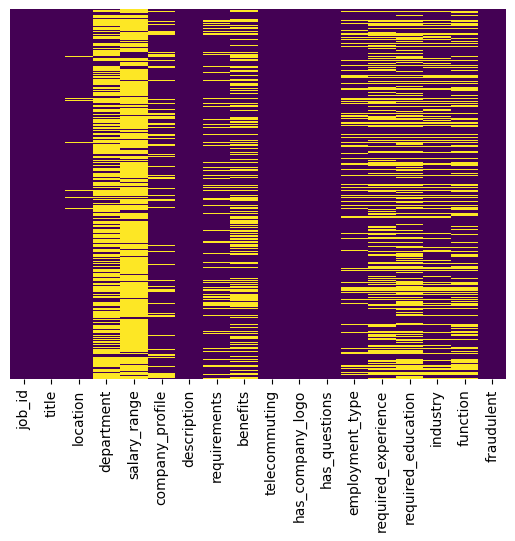

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [11]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [12]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [13]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [15]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

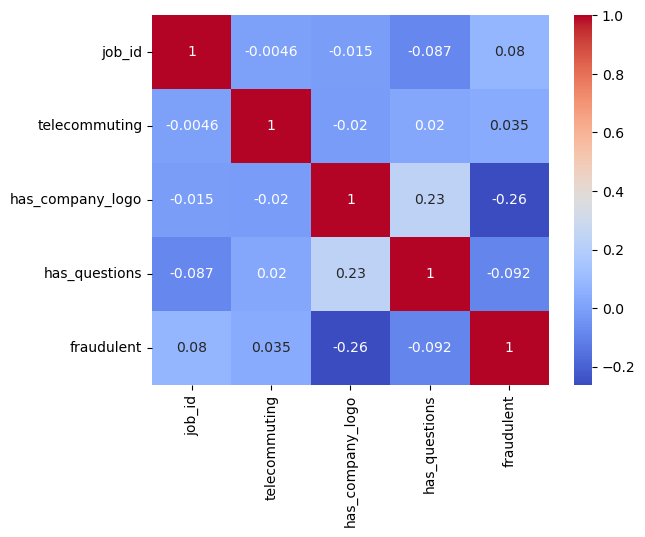

In [16]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [17]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

<Axes: xlabel='has_company_logo'>

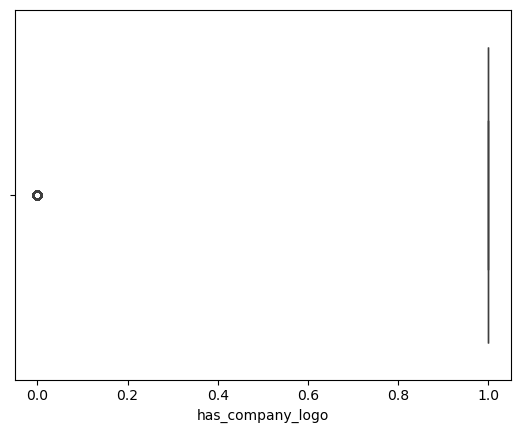

In [18]:
sns.boxplot(x='has_company_logo',data=df)

In [19]:
df=df[df['has_company_logo']>0.0]

<Axes: xlabel='has_company_logo'>

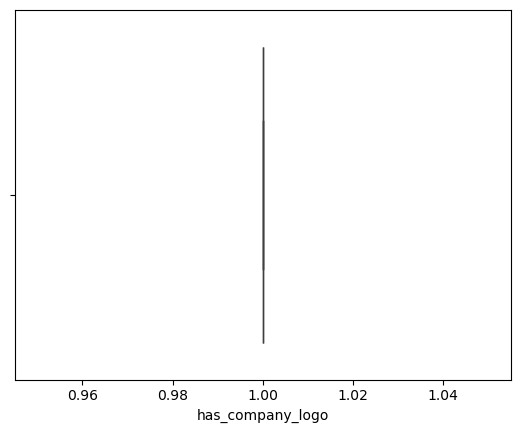

In [20]:
sns.boxplot(x='has_company_logo',data=df)

In [21]:
df['country'] = df['location'].str.split(',').str[0]

/tmp/ipykernel_21091/1353859512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].str.split(',').str[0]


In [22]:
df.nunique()

job_id                 14220
title                   9091
location                2393
department              1078
salary_range             659
company_profile         1579
description            11723
requirements            9812
benefits                5095
has_company_logo           1
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
country                   86
dtype: int64

/tmp/ipykernel_21091/1657835631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

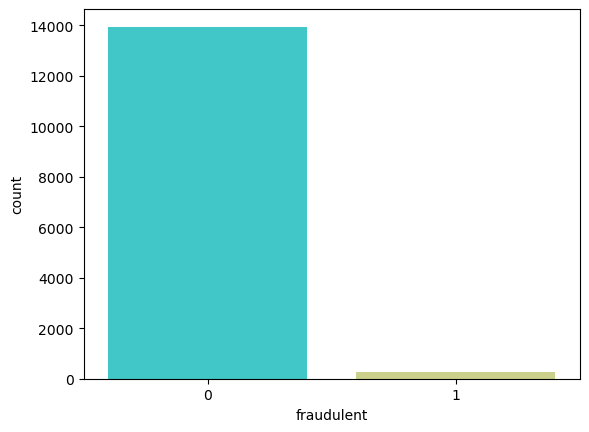

In [23]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

In [24]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [25]:
real=df[df['fraudulent']==0]
real.shape

(13937, 17)

In [26]:
df.shape

(14220, 17)

In [27]:
fake=fake.sample(13937,replace=True)

In [28]:
real.shape,fake.shape

((13937, 17), (13937, 17))

In [29]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
1,1,11769,Lead Software Engineer - Web,"US, CA, San Francisco",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Do you want to help improve the lives of farme...,Creativity and passion for developing high ...,Perks: * A ground floor opportunity as part ...,1,NaN,NaN,NaN,NaN,Engineering,1,US
2,2,6529,CALL CENTER REP,"US, TX, AUSTIN",CALLCENTER,30000-40000,The Accion story began more than 100 years ag...,Our Call Center Rep would be expected to be ex...,Requirements:The qualifications for this posi...,"100% coverage of dental, vision and life insur...",1,Full-time,Associate,High School or equivalent,Financial Services,Customer Service,1,US
3,3,13139,Principal Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Degre...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
4,4,8478,Senior Software Engineer QA Automation,"US, CA, San Mateo",Engineering,NaN,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,"Senior Software Engineer, QA AutomationQuality...",Qualifications:• BS in Computer Science or sim...,Our core values drive our culture. This is wha...,1,Full-time,NaN,Bachelor's Degree,Marketing and Advertising,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


/tmp/ipykernel_21091/1657835631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

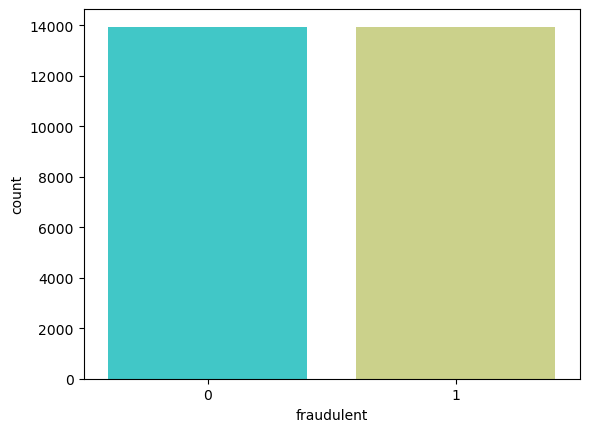

In [30]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

/tmp/ipykernel_21091/1481425060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

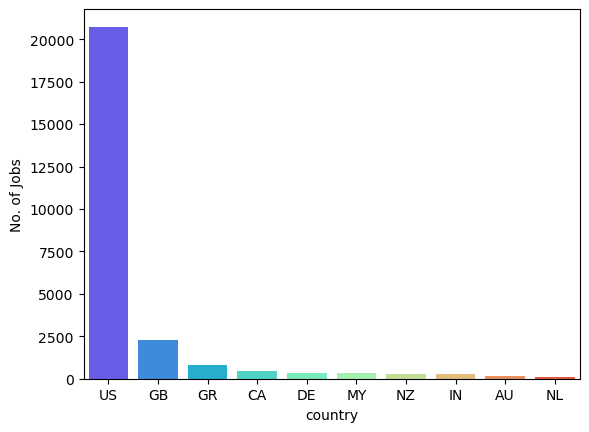

In [31]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

/tmp/ipykernel_21091/2002234686.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

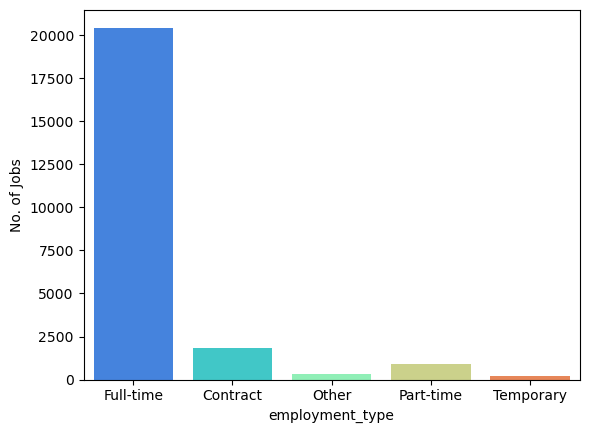

In [32]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [33]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
1,11769,Lead Software Engineer - Web,"US, CA, San Francisco",Engineering,NaN,Aptitude Staffing Solutions has redesigned the...,Do you want to help improve the lives of farme...,Creativity and passion for developing high ...,Perks: * A ground floor opportunity as part ...,1,NaN,NaN,NaN,NaN,Engineering,1,US
2,6529,CALL CENTER REP,"US, TX, AUSTIN",CALLCENTER,30000-40000,The Accion story began more than 100 years ag...,Our Call Center Rep would be expected to be ex...,Requirements:The qualifications for this posi...,"100% coverage of dental, vision and life insur...",1,Full-time,Associate,High School or equivalent,Financial Services,Customer Service,1,US
3,13139,Principal Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Degre...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
4,8478,Senior Software Engineer QA Automation,"US, CA, San Mateo",Engineering,NaN,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,"Senior Software Engineer, QA AutomationQuality...",Qualifications:• BS in Computer Science or sim...,Our core values drive our culture. This is wha...,1,Full-time,NaN,Bachelor's Degree,Marketing and Advertising,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


/tmp/ipykernel_21091/1517523785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

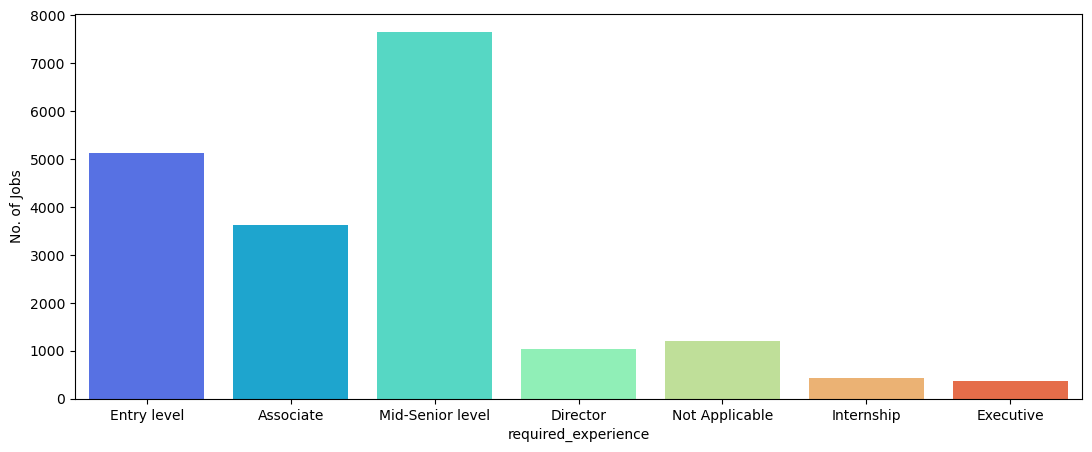

In [34]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

/tmp/ipykernel_21091/884709019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

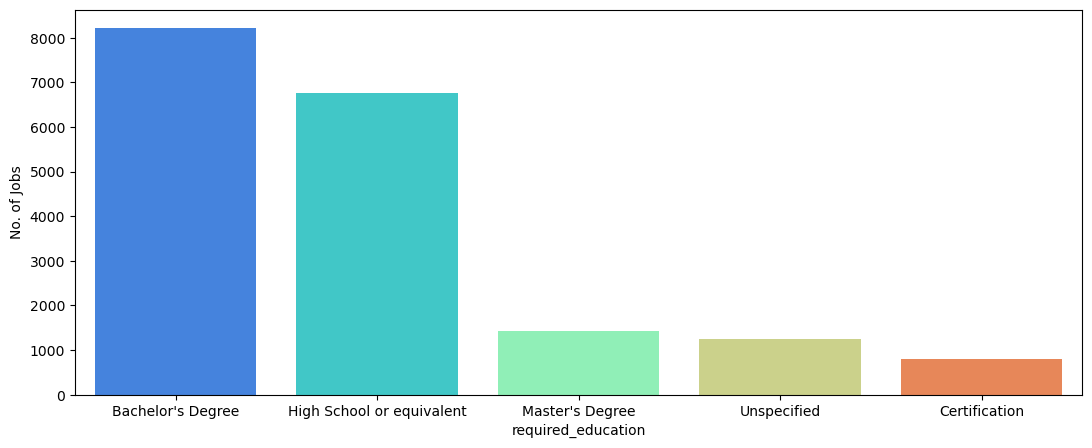

In [35]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [36]:
df.fillna(' ',inplace=True)

In [37]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [38]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,8837,Maintenance Specialist,"US, TX, ARLINGTON",MAINT,23000-28000,As the industry’s largest supply contracting c...,ResponsibilitiesResponsibilities:Responsibilit...,Minimum Qualifications:- Effective computer sk...,Compensation and BenefitsNOVATION offers a co...,1,Full-time,Entry level,High School or equivalent,Mechanical or Industrial Engineering,Engineering,1,US
1,11769,Lead Software Engineer - Web,"US, CA, San Francisco",Engineering,,Aptitude Staffing Solutions has redesigned the...,Do you want to help improve the lives of farme...,Creativity and passion for developing high ...,Perks: * A ground floor opportunity as part ...,1,,,,,Engineering,1,US
2,6529,CALL CENTER REP,"US, TX, AUSTIN",CALLCENTER,30000-40000,The Accion story began more than 100 years ag...,Our Call Center Rep would be expected to be ex...,Requirements:The qualifications for this posi...,"100% coverage of dental, vision and life insur...",1,Full-time,Associate,High School or equivalent,Financial Services,Customer Service,1,US
3,13139,Principal Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Degre...,We offer• Friendly colleagues in an industry w...,1,Full-time,,,Oil & Energy,Engineering,1,US
4,8478,Senior Software Engineer QA Automation,"US, CA, San Mateo",Engineering,,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,"Senior Software Engineer, QA AutomationQuality...",Qualifications:• BS in Computer Science or sim...,Our core values drive our culture. This is wha...,1,Full-time,,Bachelor's Degree,Marketing and Advertising,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,,,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,1,Contract,,,Utilities,,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


In [39]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [40]:
df.drop('country',axis=1,inplace=True)

In [41]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,8837,1,1,"Maintenance Specialist US, TX, ARLINGTON 23000..."
1,11769,1,1,"Lead Software Engineer - Web US, CA, San Franc..."
2,6529,1,1,"CALL CENTER REP US, TX, AUSTIN 30000-40000 The..."
3,13139,1,1,"Principal Engineer US, TX, Houston Aker Solu..."
4,8478,1,1,"Senior Software Engineer QA Automation US, CA,..."


In [42]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

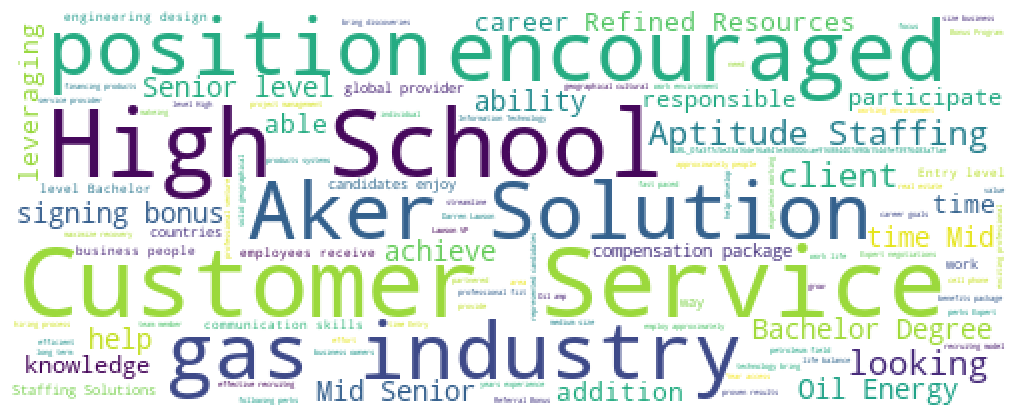

In [43]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

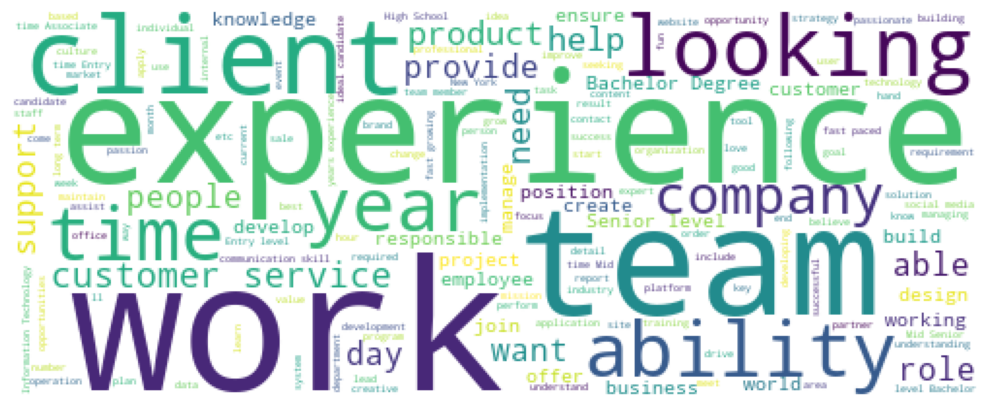

In [44]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

# Data Cleaning


In [45]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [48]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,8837,1,1,maintenance specialist us tx arlington 23000 2...
1,11769,1,1,lead software engineer web us ca san francisco...
2,6529,1,1,call center rep us tx austin 30000 40000 accio...
3,13139,1,1,principal engineer us tx houston aker solution...
4,8478,1,1,senior software engineer qa automation us ca s...


# Data Normalization

Using spaCy's English language model (`en_core_web_sm`) for text preprocessing. The function called `normalize_text` tokenizes the input text, lemmatizes each token, and then returns the normalized text.

In [49]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 48.9 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [50]:
nlp = spacy.load("en_core_web_md")

def normalize_text(text):
    """Normalize text by lemmatizing using spaCy."""
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [76]:
df['combined_text'] = df['combined_text'].apply(normalize_text)

In [51]:
def get_pos_features(text):
    """Generate POS tags for a given text."""
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return ' '.join(tag[1] for tag in tags)

# Feature Extraction

In [64]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [77]:
# Generate POS tags and vectorize them
df['pos_features'] = df['combined_text'].apply(get_pos_features)

In [78]:
# Vectorize text and POS features separately
text_vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = text_vectorizer.fit_transform(df['combined_text'])

pos_vectorizer = CountVectorizer()  # Use a new vectorizer for POS tags
pos_matrix_train = pos_vectorizer.fit_transform(df['pos_features'])

# Combine text and POS feature matrices
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

In [67]:
# Save vectorizers
with open('text_vectorizer.pkl', 'wb') as file:
    pickle.dump(text_vectorizer, file)

with open('pos_vectorizer.pkl', 'wb') as file:
    pickle.dump(pos_vectorizer, file)

# Models

In [79]:
X=combined_matrix_train
y=df['fraudulent'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
import numpy as np
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import Sequence

# Define a generator class for sparse data
class SparseDataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(self.X_data.shape[0] / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.X_data[idx * self.batch_size:(idx + 1) * self.batch_size].toarray()
        batch_y = self.y_data[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

# Manual train-validation split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create generators for training and validation data
train_generator = SparseDataGenerator(X_train_split, y_train_split, batch_size=32)
val_generator = SparseDataGenerator(X_val_split, y_val_split, batch_size=32)

# Build and train the model using Keras
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, validation_data=val_generator)

# Save the trained model
model.save('keras_mlp_model.h5')


Epoch 1/50
558/558 [==============================] - 316s 543ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 2.2056e-05 - val_accuracy: 1.0000
Epoch 2/50
558/558 [==============================] - 359s 643ms/step - loss: 1.8785e-05 - accuracy: 1.0000 - val_loss: 8.2075e-06 - val_accuracy: 1.0000
Epoch 3/50
558/558 [==============================] - 303s 542ms/step - loss: 7.3419e-06 - accuracy: 1.0000 - val_loss: 3.9778e-06 - val_accuracy: 1.0000
Epoch 4/50
558/558 [==============================] - 302s 541ms/step - loss: 3.2940e-06 - accuracy: 1.0000 - val_loss: 2.5135e-06 - val_accuracy: 1.0000
Epoch 5/50
558/558 [==============================] - 303s 542ms/step - loss: 1.7228e-06 - accuracy: 1.0000 - val_loss: 1.7420e-06 - val_accuracy: 1.0000
Epoch 6/50
558/558 [==============================] - 303s 543ms/step - loss: 1.0354e-06 - accuracy: 1.0000 - val_loss: 1.3027e-06 - val_accuracy: 1.0000
Epoch 7/50
558/558 [==============================] - 302s 541ms/step - loss: 6.

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
import pickle
import re
import spacy
import nltk
from nltk.tokenize import word_tokenize
from keras.models import load_model
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the saved model and vectorizers
model = load_model('keras_mlp_model.h5')

with open('text_vectorizer.pkl', 'rb') as file:
    text_vectorizer = pickle.load(file)

with open('pos_vectorizer.pkl', 'rb') as file:
    pos_vectorizer = pickle.load(file)

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Define text preprocessing functions
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

def normalize_text(text):
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

def get_pos_features(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return ' '.join(tag[1] for tag in tags)

# Function to preprocess and vectorize input text
def preprocess_and_vectorize(text):
    cleaned_text = clean_text(text)
    print("Cleaned Text:", cleaned_text)  # Debug
    normalized_text = normalize_text(cleaned_text)
    print("Normalized Text:", normalized_text)  # Debug
    pos_features = get_pos_features(normalized_text)
    print("POS Features:", pos_features)  # Debug

    text_vector = text_vectorizer.transform([normalized_text])
    pos_vector = pos_vectorizer.transform([pos_features])

    combined_vector = hstack([text_vector, pos_vector])
    return combined_vector

# Function to combine input fields into a single text
def combine_fields(fields):
    return ' '.join(fields)

# Function to predict if a job posting is fraudulent
def predict_fraudulent(fields):
    combined_text = combine_fields(fields)
    vectorized_text = preprocess_and_vectorize(combined_text)
    prediction = model.predict(vectorized_text.toarray())
    return prediction[0][0]

# Example usage with new input data
input_data_new = (
    "Payroll Clerk",
    "US, NY, New York",
    "",
    "",
    "JOB DESCRIPTION We are seeking a full time payroll clerk to manage day to day accounting for our operation. PAY SCALE : $30/hr Responsibilities will include- Balancing of company accounts- Processing of weekly payroll- Processing of company credit cards- Processing of Rebates- Overall company record keeping",
    "JOB REQUIREMENTS High school diploma or equivalent Excellent communication and organizational skills Ability to work a flexible schedule Ability to perform mathematical calculations such as addition, subtraction, multiplication, division, and percentages",
    "We offer a competitive salary and benefits package that includes health and dental insurance, paid vacation, a 401(k) plan, paid training, and much more. Ready for some rapid growth of your own.",
    "Full-time",
    "",
    "",
    "Apparel & Fashion",
    "Accounting/Auditing",
    ""
)

prediction = predict_fraudulent(input_data_new)

if prediction > 0.5:
    print("The job posting is predicted to be fraudulent.", prediction)
else:
    print("The job posting is predicted to be Not fraudlulent.", prediction)


Cleaned Text: payroll clerk us ny new york job description seeking full time payroll clerk manage day day accounting operation pay scale 30 hr responsibilities include balancing company accounts processing weekly payroll processing company credit cards processing rebates overall company record keeping job requirements high school diploma equivalent excellent communication organizational skills ability work flexible schedule ability perform mathematical calculations addition subtraction multiplication division percentages offer competitive salary benefits package includes health dental insurance paid vacation 401 k plan paid training much ready rapid growth full time apparel fashion accounting auditing
Normalized Text: payroll clerk ny new york job description seek time payroll clerk manage day day accounting operation pay scale 30 hr responsibility include balance company account process weekly payroll process company credit card process rebate overall company record keep job requireme

### Logistic Regression

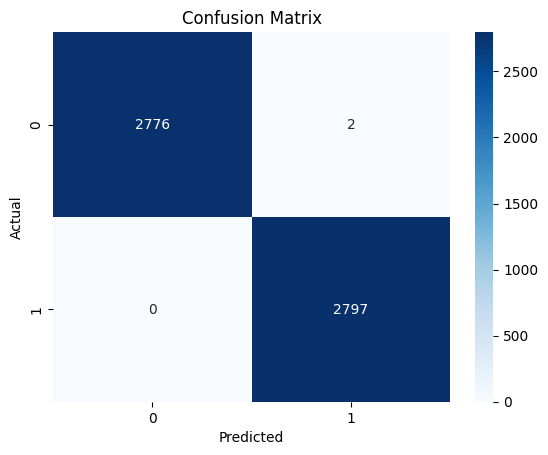

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9996412556053812
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9996426018584703


In [54]:
model = LogisticRegression(max_iter=500)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### MultinomialNB

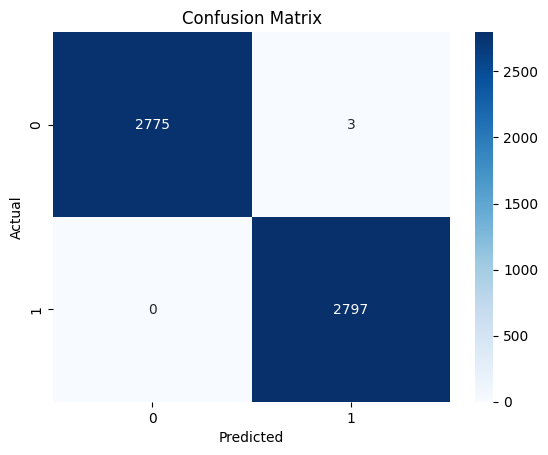

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9994618834080717
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9994639985706628


In [55]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### SVC

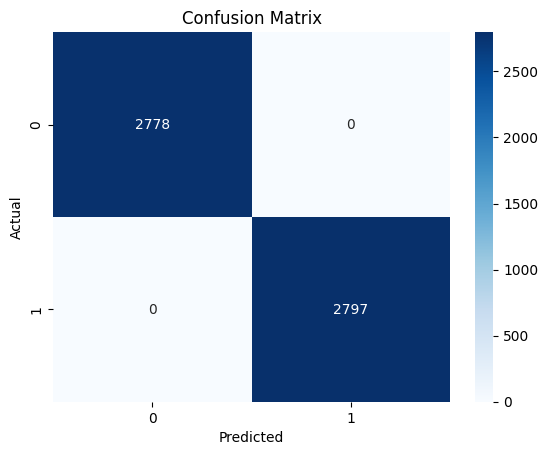

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 1.0
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 1.0


In [56]:
model3 = SVC()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

### Descision Tree

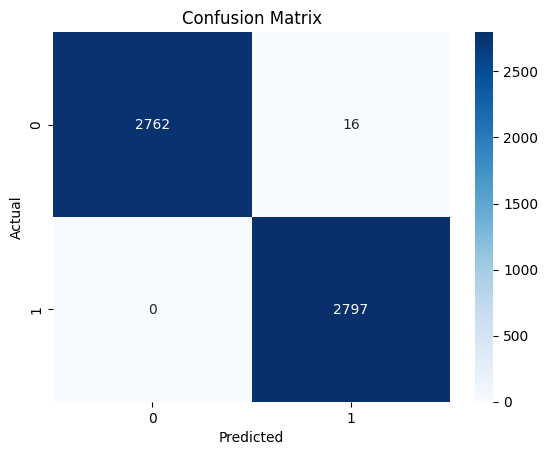

Cross-validation scores: [0.99977578 0.99977578 1.         1.         1.        ]
Average cross-validation score: 0.9999103139013453
Test set accuracy: 0.9971300448430493
Test set precision: 0.9992854590925331
Test set recall: 1.0
Test set F1 score: 0.9971479500891265


In [57]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())
print('Test set accuracy:', accuracy)
print('Test set precision:', precision)
print('Test set recall:', recall)
print('Test set F1 score:', f1)

# Evaluate MLP Model

In [69]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

# Load the trained model and vectorizers
with open('mlp_model.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

with open('text_vectorizer.pkl', 'rb') as file:
    text_vectorizer = pickle.load(file)

with open('pos_vectorizer.pkl', 'rb') as file:
    pos_vectorizer = pickle.load(file)

def clean_text(text):
    """Implement text cleaning if needed."""
    return text.strip() if text else ""

def normalize_text(text):
    """Normalize text by lemmatizing using spaCy."""
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

def get_pos_features(text):
    """Generate POS tags for a given text."""
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return ' '.join(tag[1] for tag in tags)

def preprocess_input(title, location, salary_range, company_profile, description, requirements, benefits, employment_type, required_experience, required_education, industry, function, department):
    """Preprocess input text."""
    combined_text = f"{title} {location} {salary_range} {company_profile} {description} {requirements} {benefits} {employment_type} {required_experience} {required_education} {industry} {function} {department}"
    cleaned_text = clean_text(combined_text)
    print("Cleaned Text:", cleaned_text) 
    normalized_text = normalize_text(cleaned_text)
    print("Normalized Text:", normalized_text)  # Debug
    pos_features = get_pos_features(normalized_text)
    print("POS Features:", pos_features)  # Debug
    return normalized_text, pos_features

def vectorize_input(normalized_text, pos_features, text_vectorizer, pos_vectorizer):
    """Vectorize the normalized text and POS features."""
    text_matrix = text_vectorizer.transform([normalized_text])
    pos_matrix = pos_vectorizer.transform([pos_features])
    combined_matrix = hstack([text_matrix, pos_matrix])
    return combined_matrix

def predict(input_data, model, text_vectorizer, pos_vectorizer):
    """Make a prediction based on the input data."""
    normalized_text, pos_features = preprocess_input(*input_data)
    text_matrix = vectorize_input(normalized_text, pos_features, text_vectorizer, pos_vectorizer)
    prediction = model.predict(text_matrix)
    return prediction

# Example input
input_data_new = (
    "Payroll Clerk",
    "US, NY, New York",
    "",
    "",
    "JOB DESCRIPTION We are seeking a full time payroll clerk to manage day to day accounting for our operation. PAY SCALE : $30/hr Responsibilities will include- Balancing of company accounts- Processing of weekly payroll- Processing of company credit cards- Processing of Rebates- Overall company record keeping",
    "JOB REQUIREMENTS High school diploma or equivalent Excellent communication and organizational skills Ability to work a flexible schedule Ability to perform mathematical calculations such as addition, subtraction, multiplication, division, and percentages",
    "We offer a competitive salary and benefits package that includes health and dental insurance, paid vacation, a 401(k) plan, paid training, and much more. Ready for some rapid growth of your own.",
    "Full-time",
    "",
    "",
    "Apparel & Fashion",
    "Accounting/Auditing",
    ""
)


# Make prediction
prediction = predict(input_data_new, logistic_model, text_vectorizer, pos_vectorizer)
print("Prediction:", "Fraudulent" if prediction[0] == 1 else "Not Fraudulent",prediction)

Cleaned Text: Payroll Clerk US, NY, New York   JOB DESCRIPTION We are seeking a full time payroll clerk to manage day to day accounting for our operation. PAY SCALE : $30/hr Responsibilities will include- Balancing of company accounts- Processing of weekly payroll- Processing of company credit cards- Processing of Rebates- Overall company record keeping JOB REQUIREMENTS High school diploma or equivalent Excellent communication and organizational skills Ability to work a flexible schedule Ability to perform mathematical calculations such as addition, subtraction, multiplication, division, and percentages We offer a competitive salary and benefits package that includes health and dental insurance, paid vacation, a 401(k) plan, paid training, and much more. Ready for some rapid growth of your own. Full-time   Apparel & Fashion Accounting/Auditing
Normalized Text: Payroll Clerk NY New York    job description seek time payroll clerk manage day day account operation PAY SCALE $ 30 hr respons

# Train Balanced Model

In [ ]:
import numpy as np
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import Sequence

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Split the balanced training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

# Define a generator class for sparse data
class SparseDataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(self.X_data.shape[0] / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.X_data[idx * self.batch_size:(idx + 1) * self.batch_size].toarray()
        batch_y = self.y_data[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

# Create generators for training and validation data
train_generator = SparseDataGenerator(X_train_split, y_train_split, batch_size=32)
val_generator = SparseDataGenerator(X_val_split, y_val_split, batch_size=32)

# Build the model (assuming you need to redefine it for training again)
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train_split.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the balanced training data and the generators
history = model.fit(train_generator, epochs=50, validation_data=val_generator)


Epoch 1/50
558/558 [==============================] - 315s 542ms/step - loss: 0.0156 - accuracy: 0.9939 - val_loss: 5.8735e-05 - val_accuracy: 1.0000
Epoch 2/50
558/558 [==============================] - 359s 644ms/step - loss: 1.4336e-05 - accuracy: 1.0000 - val_loss: 3.7851e-05 - val_accuracy: 1.0000
Epoch 3/50
558/558 [==============================] - 302s 540ms/step - loss: 5.1365e-06 - accuracy: 1.0000 - val_loss: 3.1303e-05 - val_accuracy: 1.0000
Epoch 4/50
558/558 [==============================] - 302s 540ms/step - loss: 2.4972e-06 - accuracy: 1.0000 - val_loss: 2.8499e-05 - val_accuracy: 1.0000
Epoch 5/50
558/558 [==============================] - 301s 538ms/step - loss: 1.4774e-06 - accuracy: 1.0000 - val_loss: 2.4244e-05 - val_accuracy: 1.0000
Epoch 6/50
558/558 [==============================] - 303s 542ms/step - loss: 8.9017e-07 - accuracy: 1.0000 - val_loss: 2.3036e-05 - val_accuracy: 1.0000
Epoch 7/50
558/558 [==============================] - 304s 544ms/step - loss: 6.

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


MemoryError: Unable to allocate 33.8 GiB for an array with shape (5575, 813503) and data type int64

In [84]:
# Save the trained model
model.save('keras_mlp_model_balanced.h5')

# Define a generator class for prediction
class SparsePredictionGenerator(Sequence):
    def __init__(self, X_data, batch_size):
        self.X_data = X_data
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(self.X_data.shape[0] / self.batch_size))

    def __getitem__(self, idx):
        batch_x = self.X_data[idx * self.batch_size:(idx + 1) * self.batch_size].toarray()
        return batch_x

# Create a prediction generator for the test set
test_generator = SparsePredictionGenerator(X_test, batch_size=32)

# Predict on the test set using the generator
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

175/175 [==============================] - 41s 233ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2778
           1       1.00      1.00      1.00      2797

    accuracy                           1.00      5575
   macro avg       1.00      1.00      1.00      5575
weighted avg       1.00      1.00      1.00      5575

Confusion Matrix:
 [[2778    0]
 [   0 2797]]
ROC AUC Score: 1.0


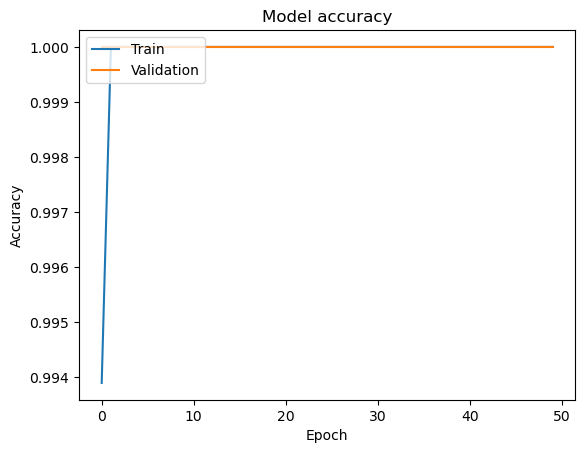

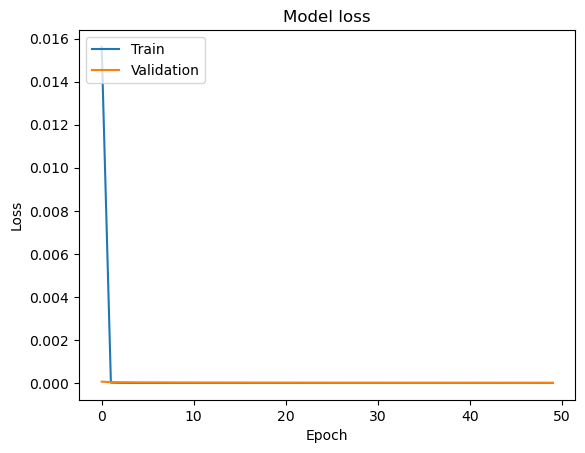

In [85]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()